Titanic_EDA_Project

In [ ]:
# Titanic_EDA_Project.ipynb


In [ ]:
import pandas as pd
df = pd.read_csv("/content/train (1).csv")
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Survival Count

**Explanation:** This plot shows the number of passengers who survived vs. those who did not. It helps us see the overall survival rate on the Titanic.


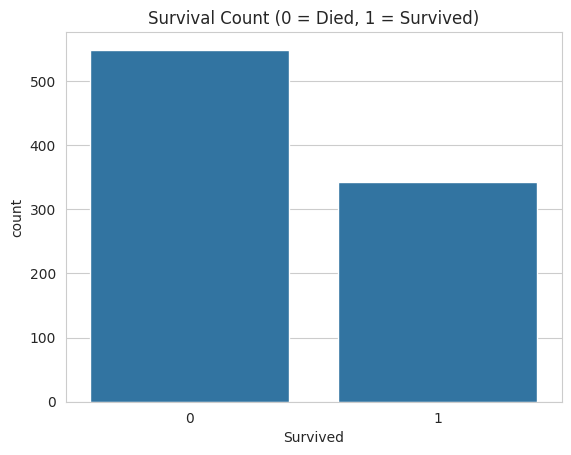

In [ ]:

# Plot Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


**Observation:** A significantly higher number of passengers did not survive compared to those who did, highlighting the tragedy of the Titanic disaster.

### Gender Distribution

**Explanation:** This plot shows the number of male and female passengers on the Titanic. It helps us understand the gender balance in the dataset.


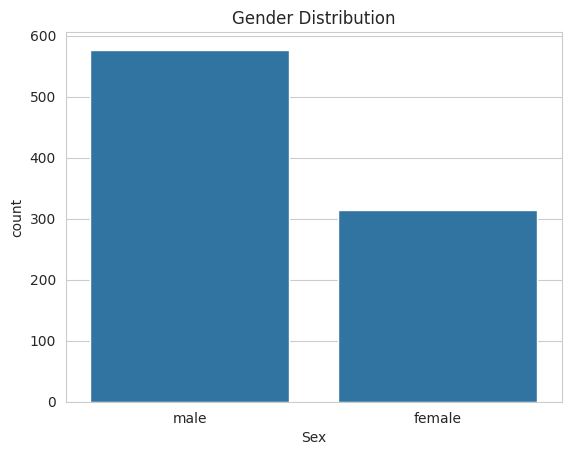

In [ ]:
# Plot Gender Distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

**Observation:** There were significantly more male passengers than female passengers on board the Titanic.


### Passenger Class Distribution

**Explanation:** This plot shows how many passengers were in each class (1st, 2nd, 3rd). It gives an idea of the Titanic's class structure and how passengers were distributed.

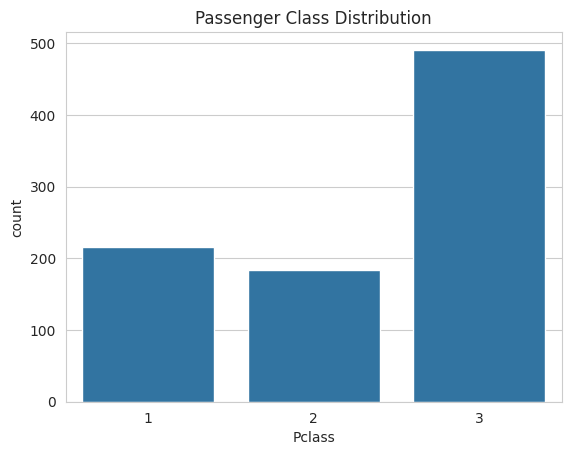

In [ ]:
# Plot Passenger Class Distribution
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

**Observation:** Most passengers were in 3rd class, followed by 1st and 2nd. This shows that the Titanic carried a large number of lower-class passengers.


### Survival by Gender

**Explanation:** This plot shows survival rates grouped by gender. It helps us understand whether men or women had higher chances of survival on the Titanic.


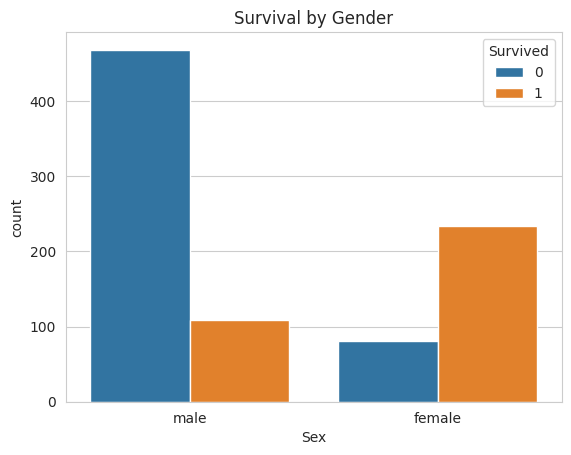

In [ ]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


**Observation:** A much higher proportion of women survived compared to men. This suggests that gender played a major role in survival — possibly due to the "women and children first" evacuation policy.


### Survival by Passenger Class

**Explanation:** This plot shows survival counts across different passenger classes (1st, 2nd, 3rd). It helps us understand whether class had an impact on survival rates.




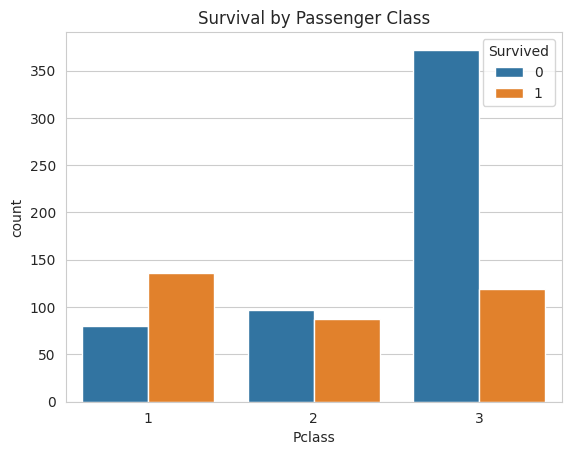

In [ ]:
#  Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


**Observation:** Passengers in 1st class had a much higher survival rate than those in 2nd or 3rd class. Survival chances dropped significantly for 3rd class passengers.

### Boxplot: Fare vs Survival

**Explanation:** This boxplot compares the distribution of fares for passengers who survived and those who didn’t. It helps reveal if paying higher fares increased the chance of survival.



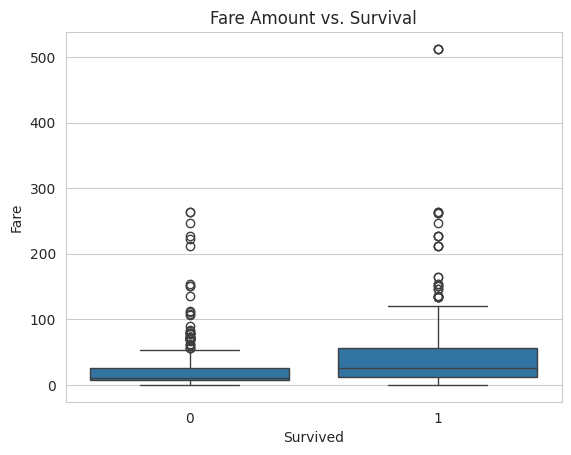

In [ ]:
# Boxplot: Fare vs. Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Amount vs. Survival")
plt.show()


**Observation:** Passengers who paid higher fares had a higher chance of survival. This indicates that people in higher classes (who paid more) were more likely to survive.


### Boxplot: Age vs Survival

**Explanation:** This boxplot displays the age distribution for passengers who survived vs those who didn’t. It can reveal if younger passengers had better survival chances.


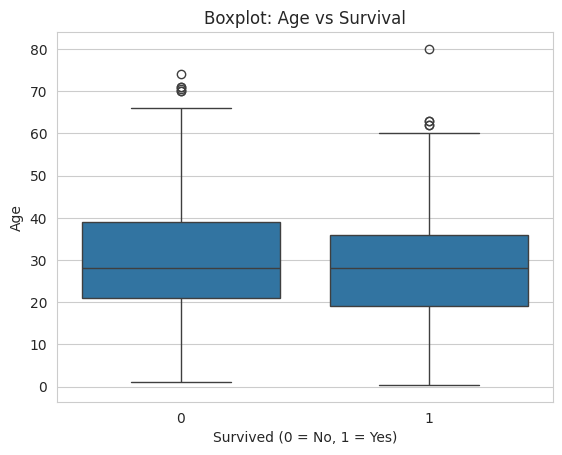

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Boxplot: Age vs Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


**Observation:** The age distribution of survivors shows a mix, but there may be a slightly higher concentration of younger survivors. Some children and young adults had better chances.


### Checking for Missing Values
We identify columns with missing data before handling them.


In [ ]:
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Data Preprocessing (Clean Start)
### Dropping Irrelevant Columns
Removed columns that do not contribute meaningfully to survival prediction.

In [ ]:
df = df.drop(columns=[col for col in ['Name', 'Ticket', 'Cabin'] if col in df.columns])
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


We identify columns with missing data before handling them.

### Filling Missing Values
- Age filled with median
- Embarked filled with most frequent value


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())



### Encoding Categorical Columns
- 'Sex' and 'Embarked' converted into numerical labels for modeling.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [ ]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


### Splitting Dataset
- 80% for training, 20% for testing
- `random_state=42` ensures reproducibility



In [ ]:
df.select_dtypes(include='object').columns



Index(['Embarked'], dtype='object')

In [ ]:
# Drop text columns that are not useful for model
df = df.drop(columns=[col for col in ['Name', 'Ticket', 'Cabin'] if col in df.columns])

# Encode 'Sex' and 'Embarked' if they're still strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

if df['Sex'].dtype == 'object':
    df['Sex'] = le.fit_transform(df['Sex'])

if 'Embarked' in df.columns and df['Embarked'].dtype == 'object':
    df['Embarked'] = le.fit_transform(df['Embarked'])


from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
# a.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediction
y_pred_lr = lr.predict(X_test)

# Evaluation performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))




# b.Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))





# c.Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))




Logistic Regression Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]
Decision Tree Accuracy: 0.7597765363128491

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179


Confusion Matrix:
 [[84 21]
 [22 52]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[93 12]
 [20 54]]


Support Vector Machine (SVM)


In [ ]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.5977653631284916

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179


Confusion Matrix:
 [[103   2]
 [ 70   4]]


K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



KNN Accuracy: 0.659217877094972

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.64      0.41      0.50        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.65      0.66      0.64       179


Confusion Matrix:
 [[88 17]
 [44 30]]


Naive Bayes


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.776536312849162

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
 [[82 23]
 [17 57]]


Model Comparison

In [ ]:
# Model Comparison and Selection

models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Display model accuracies
for model_name, acc in models.items():
  print(f"{model_name}: {acc:.4f}")

Logistic Regression: 0.8101
Decision Tree: 0.7598
Random Forest: 0.8212
SVM: 0.5978
KNN: 0.6592
Naive Bayes: 0.7765


Visualize Comparison

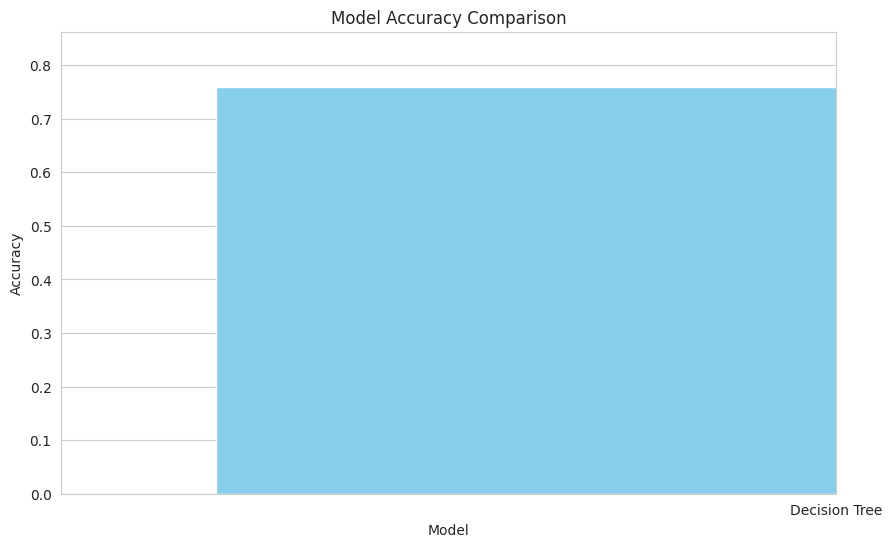

In [ ]:
# Visualize Comparison

import matplotlib.pyplot as plt

model_names = list(models.keys())
accuracy_scores = list(models.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0.5, 1)
plt.grid(axis='x')
plt.show()


Best Model

In [ ]:
best_model = rf  # assuming Random Forest performed best


import joblib

joblib.dump(best_model, 'titanic_model.pkl')  # saves your model to file



model = joblib.load("titanic_model.pkl")
prediction = model.predict(X_test)


def predict_survival(model, input_data):
  return model.predict(input_data)
